<a href="https://colab.research.google.com/github/gabrielasenareis/python-basico/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ConfusionMatrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Credit.csv to Credit.csv


*  Esse dataframe é de um banco alemão e basicamente ele dá as características dos clientes e informa se não bons ou maus pagadores de créditos.


In [ ]:
credito = pd.read_csv('Credit.csv')
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
credito.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [ ]:
credito.duplicated().sum()

0

In [ ]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

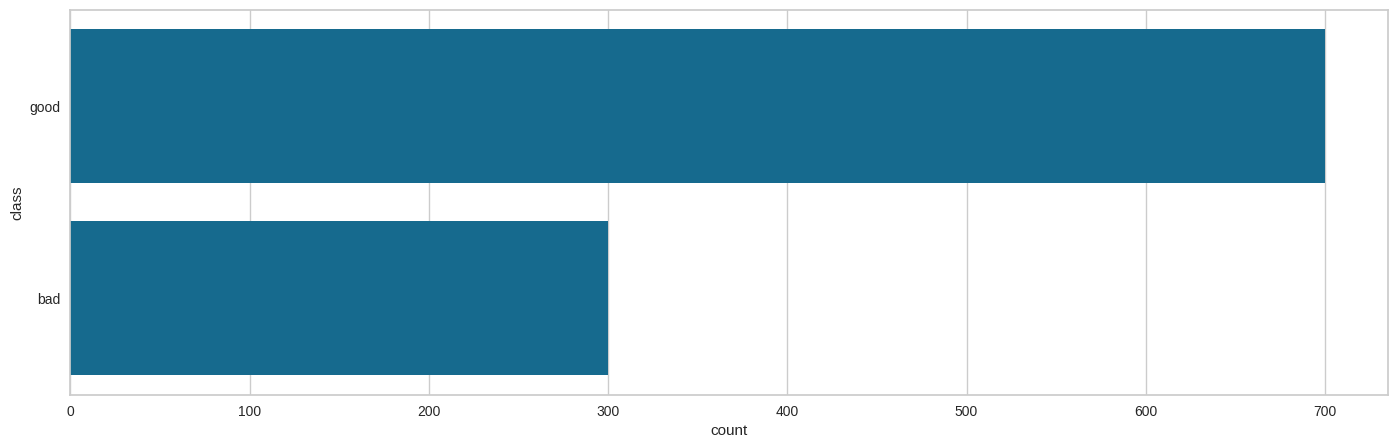

In [ ]:
plt.figure(figsize=(17,5))
sns.countplot(data=credito['class'])
plt.show()

In [ ]:
colunas_categoricas = credito.select_dtypes(include=['object']).columns.tolist()
colunas_categoricas.remove('class')
colunas_categoricas

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [ ]:
df = credito.copy()
le = LabelEncoder()
for col in colunas_categoricas:
    df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   int64 
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   int64 
 3   purpose                 1000 non-null   int64 
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   int64 
 6   employment              1000 non-null   int64 
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   int64 
 9   other_parties           1000 non-null   int64 
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   int64 
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   int64 
 14  housing                 1000 non-null   int64 
 15  exist

In [ ]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,4,2,67,1,1,2,3,1,1,1,good
1,1,48,3,7,5951,3,0,2,0,2,2,2,22,1,1,1,3,1,0,1,bad
2,0,12,1,4,2096,3,1,2,3,2,3,2,49,1,1,1,2,2,0,1,good
3,2,42,3,5,7882,3,1,2,3,1,4,0,45,1,0,1,3,2,0,1,good
4,2,24,2,1,4870,3,0,3,3,2,4,1,53,1,0,2,3,2,0,1,bad


In [ ]:
previsores = df.iloc[:, 1:20].values
classe = df.iloc[:, 20].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.3, random_state=0)
x_test

array([[36,  3,  5, ...,  1,  1,  1],
       [ 9,  3,  1, ...,  2,  0,  0],
       [18,  3,  5, ...,  1,  1,  1],
       ...,
       [24,  1,  5, ...,  1,  0,  1],
       [27,  4,  3, ...,  1,  1,  1],
       [12,  3,  1, ...,  1,  0,  1]])

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [ ]:
previsoes = naive_bayes.predict(x_test)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad',
       'goo

In [ ]:
confusao = confusion_matrix(y_test, previsoes)
confusao

array([[ 39,  47],
       [ 40, 174]])

In [ ]:
taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

0.71